# X1e Data Set

In [1]:
import lxml.etree as etree
import json
import re
import pathlib

import pandas

regex = re.compile("JSON.parse\((.*)\)")
coches = []

for file in (pathlib.Path.cwd()/"X1e").rglob("*.html"):
    doc = etree.parse(file, etree.HTMLParser())

    script = doc.xpath("""//script[contains(text(), "__INITIAL_PROPS__")]""")

    if not script:
        print("Skipping:", file)
        continue

    result = regex.search(script[0].text)
    result = result.group(1)
    result = eval(result)

    result = json.loads(result)


    for r in result["initialResults"]["items"]:
        for k in "photos","img","imgUrl":
            r.pop(k, None)
        coches.append(r)

frame = pandas.DataFrame(coches)

frame.describe()


,bodyTypeId,financedPrice,fuelTypeId,km,price,provinceId,specificFuelTypeId,taxTypeId,warrantyId,warrantyMonths,year
count,32.0,16.00000,32.0,32.000000,32.000000,32.000000,32.0,32.000000,32.000000,32.000000,32.000000
mean,6.0,41204.06250,5.0,18999.531250,42705.312500,24.625000,5.0,1.156250,3.593750,21.750000,2020.781250
std,0.0,2279.60612,0.0,8572.197866,3565.540935,13.736577,0.0,0.368902,0.837021,5.441774,0.552669
min,6.0,35900.00000,5.0,15.000000,37900.000000,1.000000,5.0,1.000000,2.000000,12.000000,2020.000000
25%,6.0,40175.00000,5.0,14424.500000,39900.000000,8.000000,5.0,1.000000,3.750000,22.500000,2020.000000
50%,6.0,41695.00000,5.0,21213.000000,42760.000000,28.000000,5.0,1.000000,4.000000,24.000000,2021.000000
75%,6.0,42923.75000,5.0,23350.000000,44592.500000,35.000000,5.0,1.000000,4.000000,24.000000,2021.000000
max,6.0,44400.00000,5.0,32819.000000,54900.000000,46.000000,5.0,2.000000,5.000000,36.000000,2022.000000


<AxesSubplot:xlabel='km', ylabel='price'>

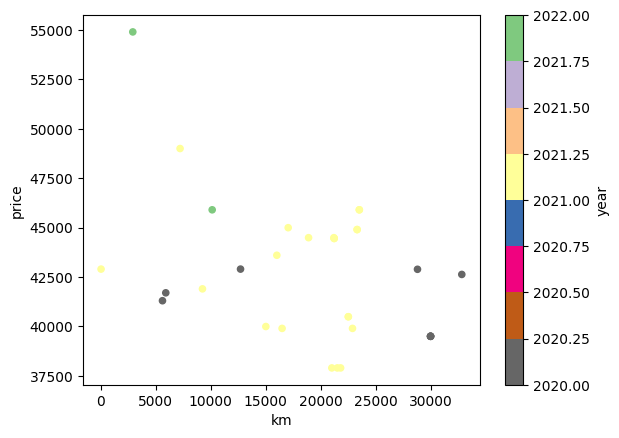

In [7]:
from collections import defaultdict

frame.plot.scatter(x="km", y="price", c="year", colormap="Accent_r")
